In [59]:
import numpy as np
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
np.random.seed(101)

In [61]:
num_features = 2
n_class = 2
num_points = 150

In [62]:
x, y = make_classification(n_samples=num_points, n_features = num_features, n_redundant=0, n_informative=2, n_clusters_per_class=n_class)

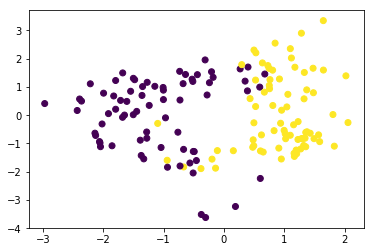

In [63]:
plt.scatter(x[:,0], x[:,1], c=y)

In [64]:
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)

In [70]:
#pred = np.random.uniform(x.min(), x.max(), size=(2,1))
pred = [0.5, 1.5]
#pred = [0.5, 0.5, 0]

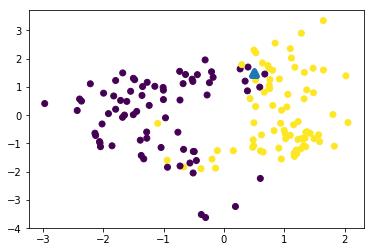

In [71]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(pred[0], pred[1], marker = '^', linewidths=5)

In [72]:
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)
# ax.scatter(pred[0], pred[1], pred[2], marker = '^', linewidths=5)

In [73]:
def compute_distances(points, pred_point, labels, k):
    distances = [[np.linalg.norm(point-pred_point), index, label] for index, point, label in zip(range(len(labels)), points, labels)]
    return np.array(sorted(distances)[:k])

In [74]:
distances = compute_distances(x, pred, y, 15)

In [75]:
distances

array([[  0.18407556,  44.        ,   0.        ],
       [  0.22575657,  39.        ,   0.        ],
       [  0.25930131,   7.        ,   1.        ],
       [  0.26710157,  55.        ,   0.        ],
       [  0.2943836 ,  89.        ,   1.        ],
       [  0.32137651, 143.        ,   1.        ],
       [  0.33043876,  69.        ,   0.        ],
       [  0.34279591, 134.        ,   1.        ],
       [  0.35289711, 146.        ,   1.        ],
       [  0.35849329,  67.        ,   1.        ],
       [  0.37538485,  62.        ,   1.        ],
       [  0.47500083,  95.        ,   1.        ],
       [  0.51406461, 141.        ,   1.        ],
       [  0.51572743,  53.        ,   0.        ],
       [  0.62004354, 139.        ,   1.        ]])

In [76]:
unique, counts = np.unique(distances[:,-1], return_counts=True)

In [77]:
final_label = unique[np.argmax(counts)]

In [78]:
colors = ['b', 'g', 'r', 'c', 'm', 'y' ,'k']
colors = colors[:n_class]

In [79]:
def color_points(labels):
    points_colors = []
    for i in range(len(labels)):
        points_colors.append(colors[int(labels[i])])
    return points_colors

In [80]:
points_colors = color_points(y)

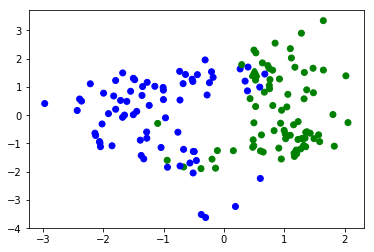

In [81]:
plt.scatter(x[:,0], x[:,1], c=points_colors)
plt.scatter(pred[0], pred[1], c =colors[int(final_label)], marker = '^', linewidths=5)

In [82]:
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=points_colors)
# ax.scatter(pred[0], pred[1], pred[2], c =colors[int(final_label)], marker = '^', linewidths=5)

In [83]:
preds_colors = color_points(distances[:,-1])

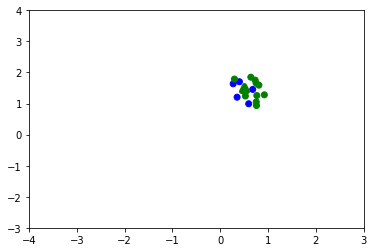

In [84]:
plt.xlim(-4,3)
plt.ylim(-3,4)

pred_points = x[distances[:,1].astype(np.int32)]

plt.scatter(pred_points[:,0], pred_points[:,1], c=preds_colors)
plt.scatter(pred[0], pred[1], c = colors[int(final_label)], marker = '^', linewidths=5)

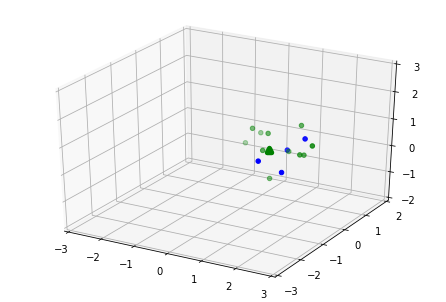

In [58]:
# pred_points = x[distances[:,1].astype(np.int32)]

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.set_xlim(-3,3)
# ax.set_ylim(-3,2)
# ax.set_zlim(-2,3)
# ax.scatter(pred_points[:, 0], pred_points[:, 1], pred_points[:, 2], c=preds_colors)
# ax.scatter(pred[0], pred[1], pred[2], c =colors[int(final_label)], marker = '^', linewidths=5)

# SKLEARN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(15)

In [87]:
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [88]:
predict = knn.predict(np.reshape(pred, (1,-1)))

In [89]:
predict

array([1])